In [44]:
import pandas as pd
df = pd.read_csv('data/White_Variety.csv')
df

,Price Date,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,2019-10-31,White,FAQ,7000,9000,8500.0
1,2019-10-31,White,FAQ,8840,8840,8840.0
2,2019-10-31,White,FAQ,8900,9250,9050.0
3,2019-10-31,White,FAQ,8600,10140,9200.0
4,2019-10-31,White,FAQ,9135,9930,9600.0
...,...,...,...,...,...,...
32912,2024-10-30,White,FAQ,11400,11600,11500.0
32913,2024-10-30,White,FAQ,11250,11450,11360.0
32914,2024-10-30,White,FAQ,9500,9500,9500.0
32915,2024-10-30,White,FAQ,10890,11200,11000.0


In [45]:
df.columns

Index(['Price Date', 'Variety', 'Grade', 'Min Price (Rs./Quintal)',
       'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)'],
      dtype='object')

In [47]:
features = ['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)']

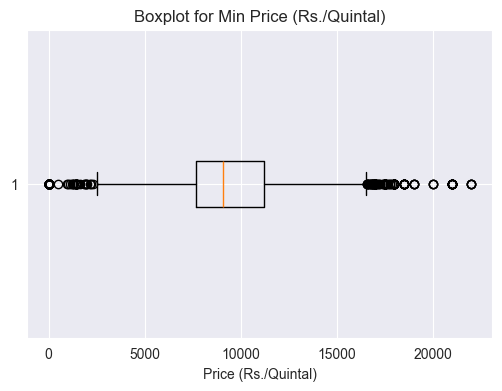

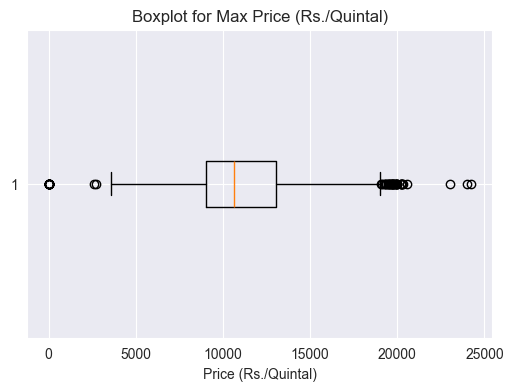

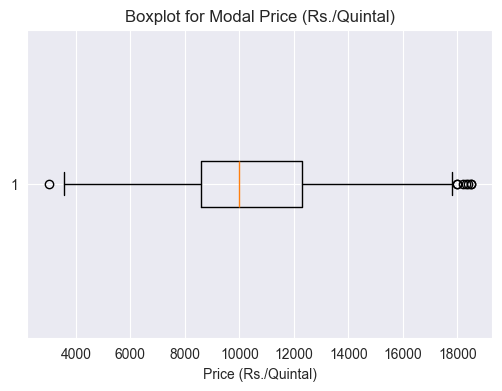

In [48]:
import matplotlib.pyplot as plt
for feature in features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot boxplot
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[feature].dropna(), vert=False)
    plt.title(f'Boxplot for {feature}')
    plt.xlabel('Price (Rs./Quintal)')
    plt.show()

    # Filter out outliers
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [49]:
print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
       Price Date Variety Grade  Min Price (Rs./Quintal)  \
0      2019-10-31   White   FAQ                     7000   
1      2019-10-31   White   FAQ                     8840   
2      2019-10-31   White   FAQ                     8900   
3      2019-10-31   White   FAQ                     8600   
4      2019-10-31   White   FAQ                     9135   
...           ...     ...   ...                      ...   
32912  2024-10-30   White   FAQ                    11400   
32913  2024-10-30   White   FAQ                    11250   
32914  2024-10-30   White   FAQ                     9500   
32915  2024-10-30   White   FAQ                    10890   
32916  2024-10-30   White   FAQ                    10500   

       Max Price (Rs./Quintal)  Modal Price (Rs./Quintal)  
0                         9000                     8500.0  
1                         8840                     8840.0  
2                         9250                     9050.0  
3   

In [50]:
import pandas as pd

df['Price Date'] = pd.to_datetime(df['Price Date'])
full_date_range = pd.date_range(start=df['Price Date'].min(), end=df['Price Date'].max())
missing_dates = full_date_range.difference(df['Price Date'])
total_dates = len(full_date_range)
missing_dates_count = len(missing_dates)
missing_percentage = (missing_dates_count / total_dates) * 100

# Display results
print(f"Total number of dates in range: {total_dates}")
print(f"Number of missing dates: {missing_dates_count}")
print(f"Percentage of missing dates: {missing_percentage:.2f}%")

Total number of dates in range: 1827
Number of missing dates: 84
Percentage of missing dates: 4.60%


In [51]:
import pandas as pd

# Ensure Price Date is in datetime format and sort the DataFrame by Price Date
df['Price Date'] = pd.to_datetime(df['Price Date'])
df = df.sort_values(by='Price Date').reset_index(drop=True)

# Generate the complete date range from min to max Price Date
full_date_range = pd.date_range(start=df['Price Date'].min(), end=df['Price Date'].max())

# Create a DataFrame with all dates in the range, preserving all existing data
df_full = pd.DataFrame({'Price Date': full_date_range})
df_full = df_full.merge(df, on='Price Date', how='left')

# List of columns to fill with a 7-day moving average
num_columns = ['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)']
cat_columns = ['Variety', 'Grade']

# For numerical columns, fill missing values with a 7-day moving average
for col in num_columns:
    df_full[col] = df_full[col].fillna(df_full[col].rolling(window=7, min_periods=1).mean())

# For categorical columns, fill missing values with the last available (lag_1) value
for col in cat_columns:
    df_full[col] = df_full[col].ffill()

# Display the resulting DataFrame
print(df_full)


      Price Date Variety Grade  Min Price (Rs./Quintal)  \
0     2019-10-31   White   FAQ                   7000.0   
1     2019-10-31   White   FAQ                   7017.0   
2     2019-10-31   White   FAQ                   8500.0   
3     2019-10-31   White   FAQ                   8700.0   
4     2019-10-31   White   FAQ                   8800.0   
...          ...     ...   ...                      ...   
32679 2024-10-30   White   FAQ                  11000.0   
32680 2024-10-30   White   FAQ                  11400.0   
32681 2024-10-30   White   FAQ                  11250.0   
32682 2024-10-30   White   FAQ                   9500.0   
32683 2024-10-30   White   FAQ                  10500.0   

       Max Price (Rs./Quintal)  Modal Price (Rs./Quintal)  
0                       9000.0                     8500.0  
1                       8300.0                     8000.0  
2                       8800.0                     8650.0  
3                       9620.0                     

In [54]:
import pandas as pd

df_full['Price Date'] = pd.to_datetime(df_full['Price Date'])
full_date_range = pd.date_range(start=df_full['Price Date'].min(), end=df_full['Price Date'].max())
missing_dates = full_date_range.difference(df_full['Price Date'])
total_dates = len(full_date_range)
missing_dates_count = len(missing_dates)
missing_percentage = (missing_dates_count / total_dates) * 100

# Display results
print(f"Total number of dates in range: {total_dates}")
print(f"Number of missing dates: {missing_dates_count}")
print(f"Percentage of missing dates: {missing_percentage:.2f}%")

Total number of dates in range: 1827
Number of missing dates: 0
Percentage of missing dates: 0.00%


In [55]:
df_full

,Price Date,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,2019-10-31,White,FAQ,7000.0,9000.0,8500.0
1,2019-10-31,White,FAQ,7017.0,8300.0,8000.0
2,2019-10-31,White,FAQ,8500.0,8800.0,8650.0
3,2019-10-31,White,FAQ,8700.0,9620.0,8800.0
4,2019-10-31,White,FAQ,8800.0,9000.0,8900.0
...,...,...,...,...,...,...
32679,2024-10-30,White,FAQ,11000.0,11000.0,11000.0
32680,2024-10-30,White,FAQ,11400.0,11600.0,11500.0
32681,2024-10-30,White,FAQ,11250.0,11450.0,11360.0
32682,2024-10-30,White,FAQ,9500.0,9500.0,9500.0


In [56]:
df_selected = df_full[['Price Date', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)']]
df_grouped = df_selected.groupby('Price Date').mean().reset_index()
print(df_grouped)


     Price Date  Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0    2019-10-31              8476.100000              9156.250000   
1    2019-11-01              8362.619048             10080.666667   
2    2019-11-02              8228.023256              9744.162791   
3    2019-11-03              8620.000000              8881.111111   
4    2019-11-04              8185.625000              9976.950000   
...         ...                      ...                      ...   
1822 2024-10-26              9873.513514             11910.000000   
1823 2024-10-27             10366.666667             10916.666667   
1824 2024-10-28             10333.593750             11987.500000   
1825 2024-10-29              9893.684211             11420.263158   
1826 2024-10-30             10720.000000             10892.857143   

      Modal Price (Rs./Quintal)  
0                   8854.900000  
1                   9385.238095  
2                   9147.720930  
3                   8768.888889  
4

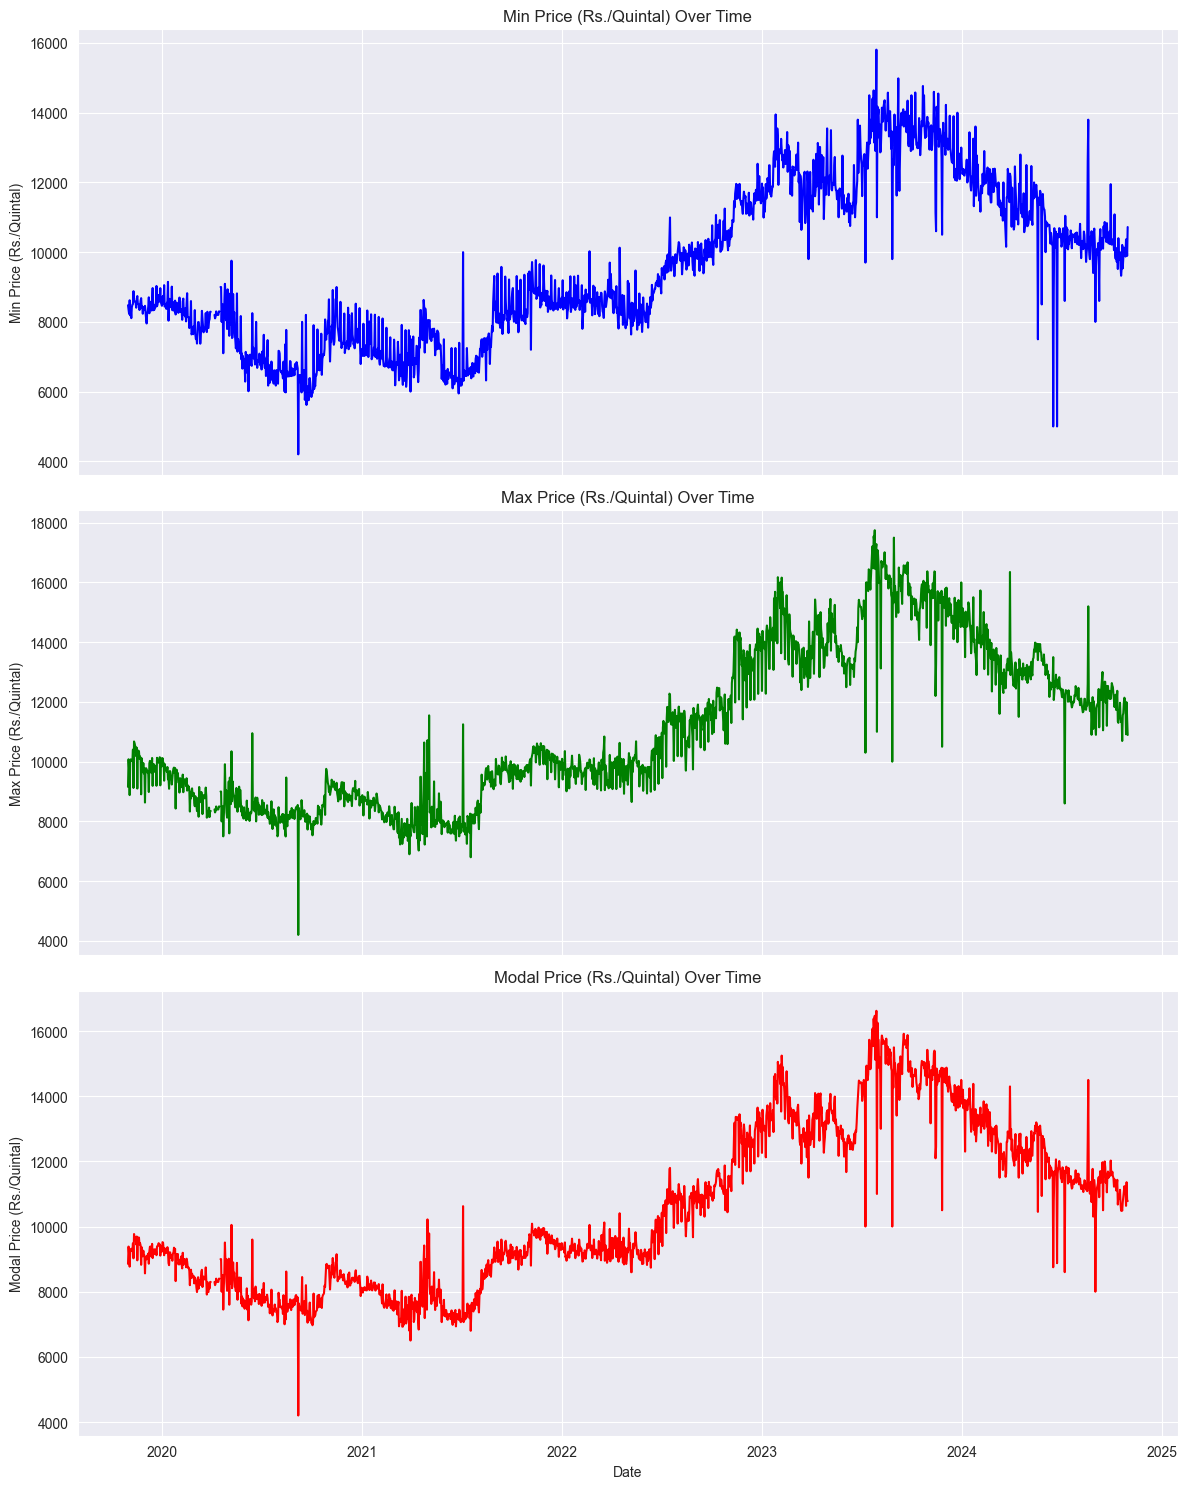

In [57]:
import matplotlib.pyplot as plt

# Set the 'Price Date' column as the index for time series plotting
df_grouped.set_index('Price Date', inplace=True)

# Plotting each price type in separate subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot Min Price
axes[0].plot(df_grouped.index, df_grouped['Min Price (Rs./Quintal)'], color='blue')
axes[0].set_title('Min Price (Rs./Quintal) Over Time')
axes[0].set_ylabel('Min Price (Rs./Quintal)')

# Plot Max Price
axes[1].plot(df_grouped.index, df_grouped['Max Price (Rs./Quintal)'], color='green')
axes[1].set_title('Max Price (Rs./Quintal) Over Time')
axes[1].set_ylabel('Max Price (Rs./Quintal)')

# Plot Modal Price
axes[2].plot(df_grouped.index, df_grouped['Modal Price (Rs./Quintal)'], color='red')
axes[2].set_title('Modal Price (Rs./Quintal) Over Time')
axes[2].set_ylabel('Modal Price (Rs./Quintal)')
axes[2].set_xlabel('Date')

# Display the plots
plt.tight_layout()
plt.show()


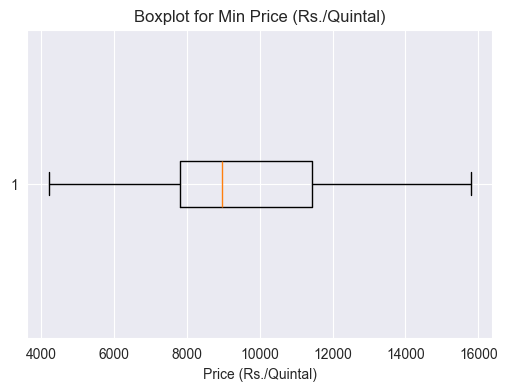

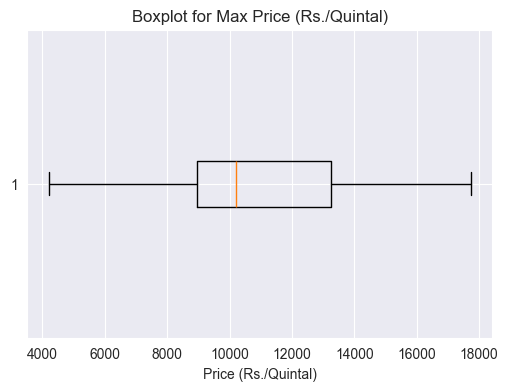

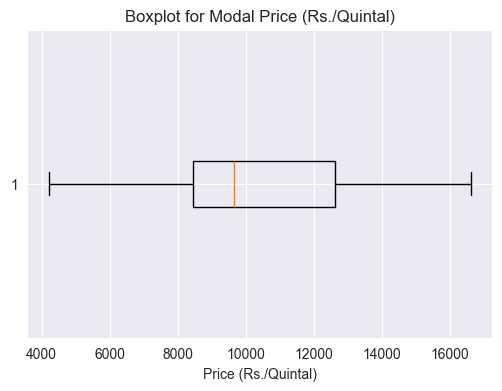

In [58]:
df = df_grouped

import matplotlib.pyplot as plt
for feature in features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot boxplot
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[feature].dropna(), vert=False)
    plt.title(f'Boxplot for {feature}')
    plt.xlabel('Price (Rs./Quintal)')
    plt.show()

    # Filter out outliers

In [59]:
df

,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,
2019-10-31,8476.100000,9156.250000,8854.900000
2019-11-01,8362.619048,10080.666667,9385.238095
2019-11-02,8228.023256,9744.162791,9147.720930
2019-11-03,8620.000000,8881.111111,8768.888889
2019-11-04,8185.625000,9976.950000,9199.375000
...,...,...,...
2024-10-26,9873.513514,11910.000000,11096.297297
2024-10-27,10366.666667,10916.666667,10635.166667
2024-10-28,10333.593750,11987.500000,11361.281250


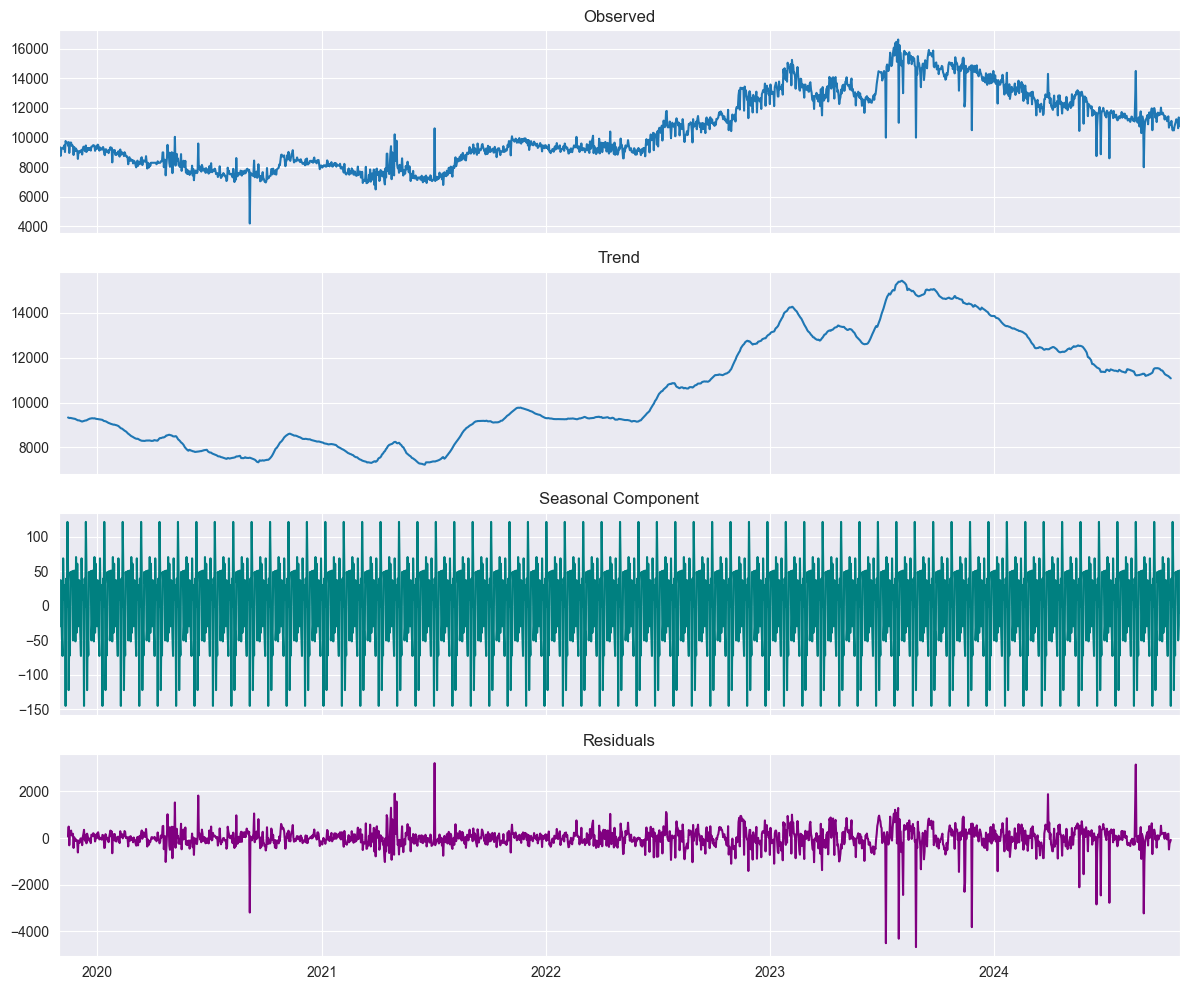

In [60]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Fill missing values using forward fill or a 7-day moving average
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].ffill()  # Or use .fillna() with other methods like rolling mean

# Ensure there's enough data
if len(df) >= 24:
    # Decompose the data
    decomposition = seasonal_decompose(df['Modal Price (Rs./Quintal)'], model='additive', period=30)

    # Create subplots for the decomposition results
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

    # Plot the decomposition results
    decomposition.observed.plot(ax=ax1, title='Observed')
    decomposition.trend.plot(ax=ax2, title='Trend')
    decomposition.seasonal.plot(ax=ax3, title='Seasonal Component', color='teal')
    decomposition.resid.plot(ax=ax4, title='Residuals', color='purple')

    # Customize the plot appearance
    for ax in [ax1, ax2, ax3, ax4]:
        ax.grid(True)
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Tight layout to avoid overlapping
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for seasonal decomposition.")


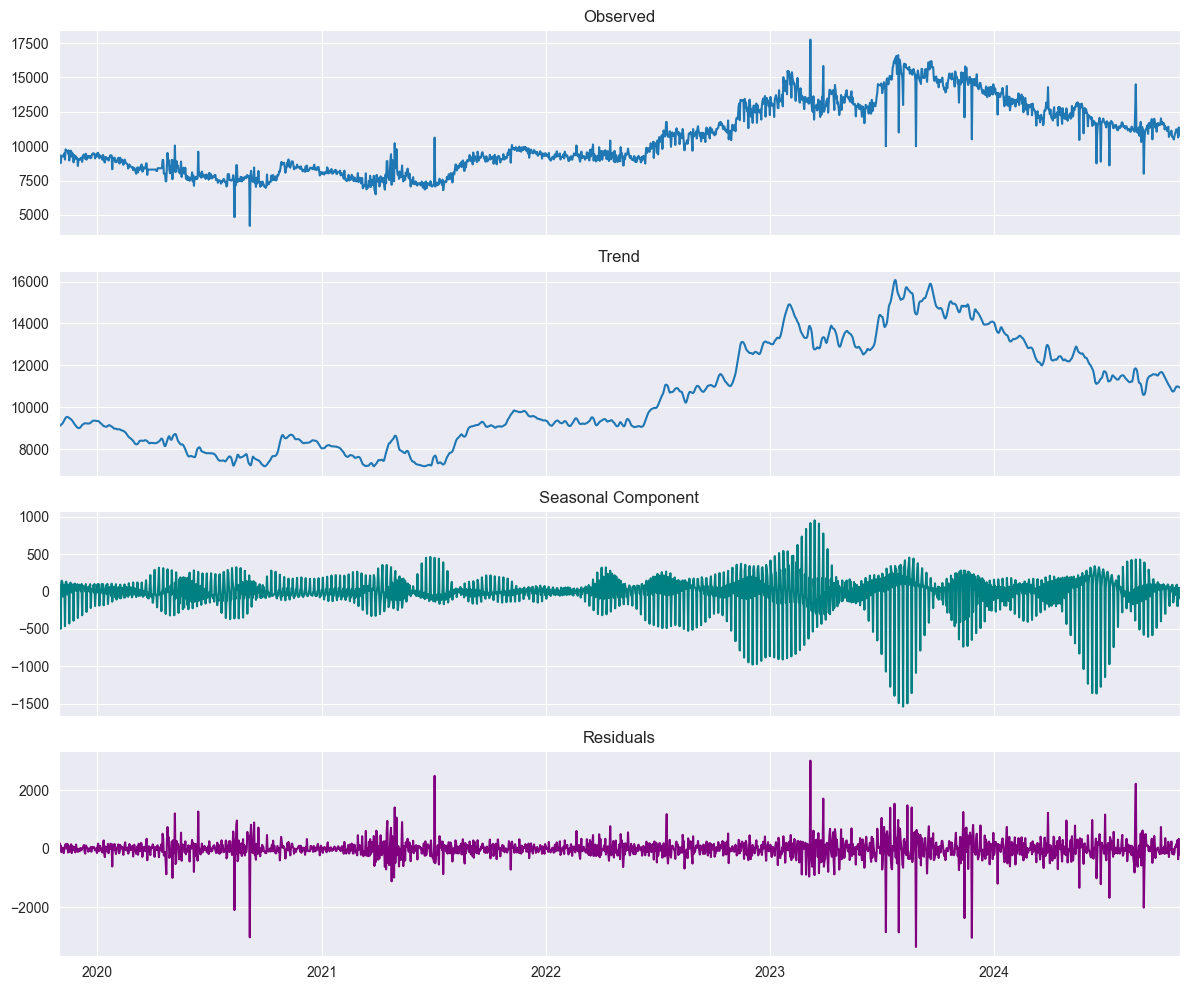

In [61]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Load and select columns
df = pd.read_csv('Data/White_Variety.csv')
df = df[["Price Date", "Modal Price (Rs./Quintal)"]]
df['Price Date'] = pd.to_datetime(df['Price Date'])

# Group by 'Price Date' and calculate the mean for each day
grouped_data = df.groupby("Price Date").mean()

# Create a copy and ensure the index is datetime
average_prices = grouped_data.copy()
average_prices.index = pd.to_datetime(average_prices.index)

# Generate a date range and reindex the dataframe
date_range = pd.date_range(start=average_prices.index.min(), end=average_prices.index.max(), freq='D')
average_prices = average_prices.reindex(date_range)

# Fill missing values using forward fill or you can use a moving average (if needed)
average_prices['Modal Price (Rs./Quintal)'] = average_prices['Modal Price (Rs./Quintal)'].ffill()

# Apply STL decomposition
stl = STL(average_prices['Modal Price (Rs./Quintal)'], seasonal=13)  # Adjust seasonal period as necessary
result = stl.fit()

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal Component', color='teal')
result.resid.plot(ax=ax4, title='Residuals', color='purple')

# Customize the plot appearance
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Tight layout to avoid overlapping
plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

# Assuming your DataFrame is 'df' and 'Modal Price (Rs./Quintal)' is the target column
df['Price Date'] = pd.to_datetime(df['Price Date'])
df = df.sort_values(by='Price Date').reset_index(drop=True)

# Group by 'Price Date' and take the mean
df = df.groupby('Price Date').agg({'Modal Price (Rs./Quintal)': 'mean'}).reset_index()

# Setting 'Price Date' as the index for time series features
df.set_index('Price Date', inplace=True)

# Calculating lag features
df['lag_1'] = df['Modal Price (Rs./Quintal)'].shift(1)
df['lag_7'] = df['Modal Price (Rs./Quintal)'].shift(7)
df['lag_30'] = df['Modal Price (Rs./Quintal)'].shift(30)

# Rolling mean (moving average) features
df['rolling_mean_7'] = df['Modal Price (Rs./Quintal)'].rolling(window=7).mean()
df['rolling_mean_30'] = df['Modal Price (Rs./Quintal)'].rolling(window=30).mean()

# Difference features (e.g., daily, weekly, and monthly differences)
df['difference_1'] = df['Modal Price (Rs./Quintal)'].diff(1)
df['difference_7'] = df['Modal Price (Rs./Quintal)'].diff(7)
df['difference_30'] = df['Modal Price (Rs./Quintal)'].diff(30)

# Exponential Moving Average (EMA)
df['ema_7'] = df['Modal Price (Rs./Quintal)'].ewm(span=7, adjust=False).mean()
df['ema_30'] = df['Modal Price (Rs./Quintal)'].ewm(span=30, adjust=False).mean()

# Additional statistical features (mean, median, std over a rolling window)
df['rolling_mean_7'] = df['Modal Price (Rs./Quintal)'].rolling(window=7).mean()
df['rolling_std_7'] = df['Modal Price (Rs./Quintal)'].rolling(window=7).std()
df['rolling_median_7'] = df['Modal Price (Rs./Quintal)'].rolling(window=7).median()

# Adding month and weekday to capture time-based seasonality
df['month'] = df.index.month
df['weekday'] = df.index.weekday

# Adding lag for percentage changes
df['pct_change_1'] = df['Modal Price (Rs./Quintal)'].pct_change(1)
df['pct_change_7'] = df['Modal Price (Rs./Quintal)'].pct_change(7)
df['pct_change_30'] = df['Modal Price (Rs./Quintal)'].pct_change(30)

# Drop any rows with missing values created by shifting and rolling
df = df.dropna()

# Display the dataframe with the newly created features
print(df.head())


KeyError: 'Price Date'

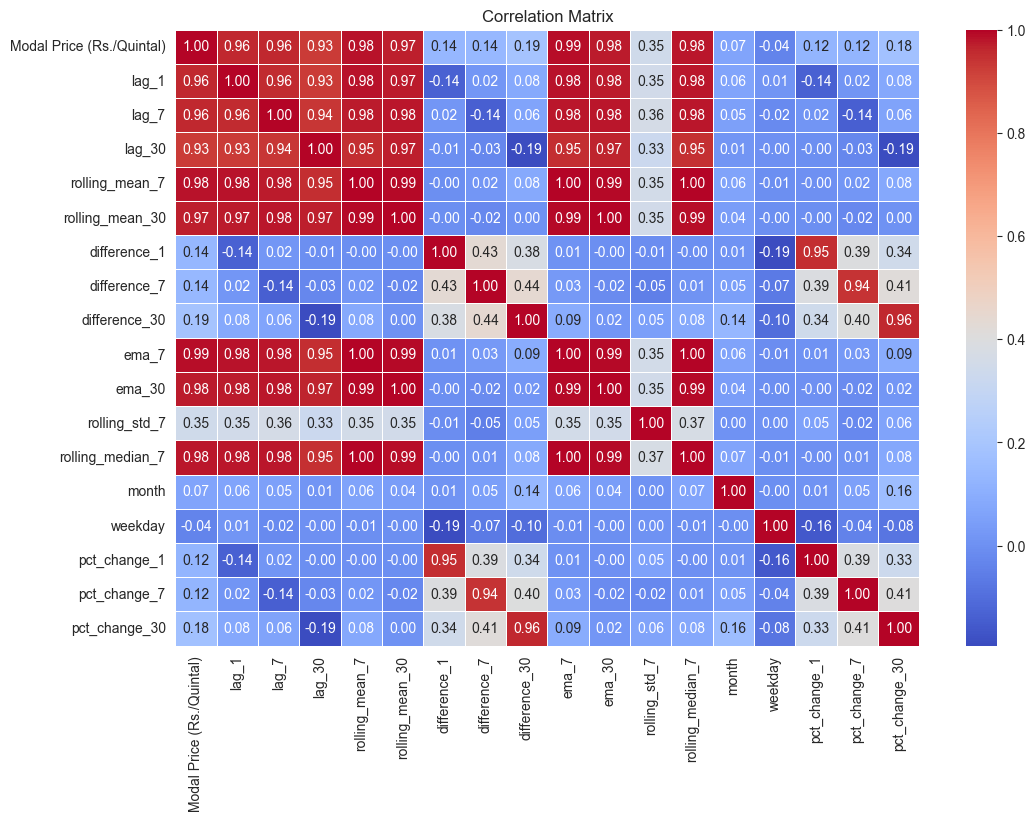

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'df' with the necessary features
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title("Correlation Matrix")
plt.show()


In [18]:
import pandas as pd

# Calculate correlation matrix
correlation_matrix = df.corr()

# Select columns with an absolute correlation of 0.7 or higher with "Modal Price (Rs./Quintal)"
target_correlation = correlation_matrix["Modal Price (Rs./Quintal)"].abs()
selected_features = target_correlation[target_correlation >= 0.7].index

# Drop columns with a correlation less than 0.7
df_filtered = df[selected_features]

print("Selected columns with correlation >= 0.7:\n", df_filtered.columns)


Selected columns with correlation >= 0.7:
 Index(['Modal Price (Rs./Quintal)', 'lag_1', 'lag_7', 'lag_30',
       'rolling_mean_7', 'rolling_mean_30', 'ema_7', 'ema_30',
       'rolling_median_7'],
      dtype='object')


In [19]:
df_filtered.columns

Index(['Modal Price (Rs./Quintal)', 'lag_1', 'lag_7', 'lag_30',
       'rolling_mean_7', 'rolling_mean_30', 'ema_7', 'ema_30',
       'rolling_median_7'],
      dtype='object')

Root Mean Squared Error (RMSE): 137.82577521025928
Mean Squared Error (MSE): 18995.94431230892
Mean Absolute Error (MAE): 71.03707071479576
R^2 Score (Accuracy): 0.9921784346595114
Best Parameters from GridSearchCV: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}


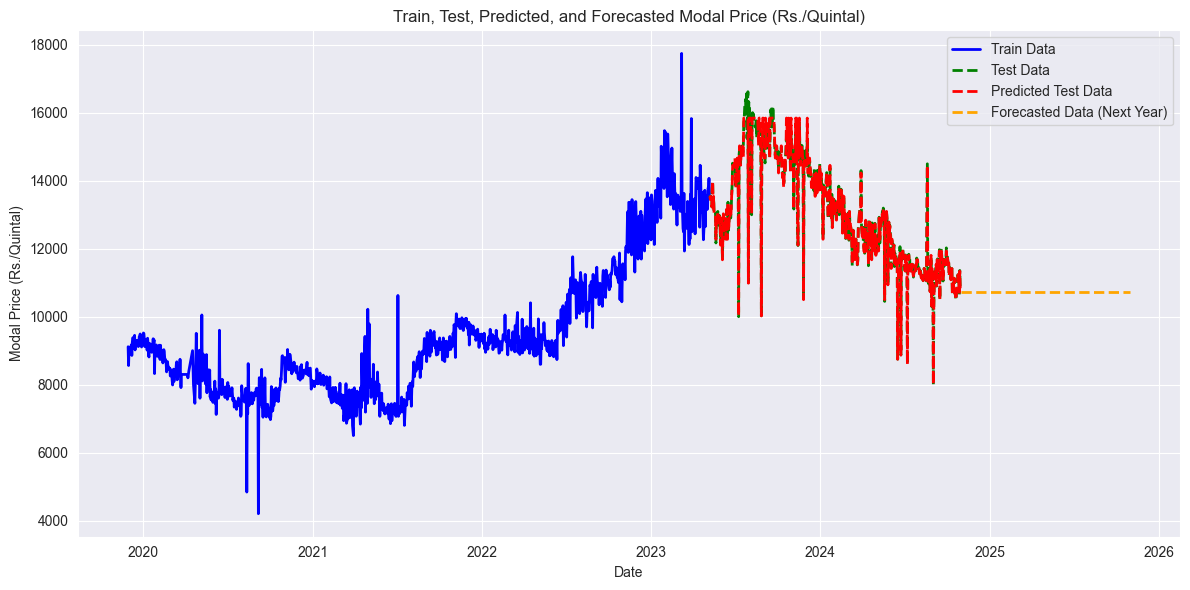

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_filtered is your DataFrame with the necessary columns
# Define features (X) as only 'Modal Price (Rs./Quintal)' and target (y)
X = df_filtered[['Modal Price (Rs./Quintal)']]  # Use only 'Modal Price' as feature
y = df_filtered['Modal Price (Rs./Quintal)']

# Split the data into training and testing sets (temporal split)
train_size = int(len(df_filtered) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Accuracy for regression (R^2 score)
accuracy = best_model.score(X_test, y_test)

# Print metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Accuracy):", accuracy)
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Forecast for one additional year (365 days)
# Start from the last known data point in the test set
last_data_point = X_test.iloc[-1:].copy()

# Future predictions for the next 365 days
future_predictions = []

# Prepare a DataFrame for tracking updated predictions and feature values
future_dates = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')

for i in range(365):
    next_prediction = best_model.predict(last_data_point.values.reshape(1, -1))[0]
    future_predictions.append(next_prediction)

    # Update the last data point with the predicted value
    last_data_point = last_data_point.copy()
    last_data_point['Modal Price (Rs./Quintal)'] = next_prediction  # Use the predicted value as the next input feature

# Convert the future predictions into a pandas Series
future_predictions_series = pd.Series(future_predictions, index=future_dates)

# Plot the train, test, predicted (test), and forecast (next year) values
plt.figure(figsize=(12, 6))

# Plot train data
plt.plot(df_filtered.index[:train_size], y[:train_size], label="Train Data", color="blue", linewidth=2)

# Plot test data
plt.plot(df_filtered.index[train_size:], y[train_size:], label="Test Data", color="green", linestyle="--", linewidth=2)

# Plot predictions on the test data
plt.plot(y_test.index, y_pred, label="Predicted Test Data", color="red", linestyle="--", linewidth=2)

# Plot forecasted data for the next year
plt.plot(future_predictions_series.index, future_predictions_series, label="Forecasted Data (Next Year)", color="orange", linestyle="--", linewidth=2)

# Title and labels
plt.title("Train, Test, Predicted, and Forecasted Modal Price (Rs./Quintal)")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


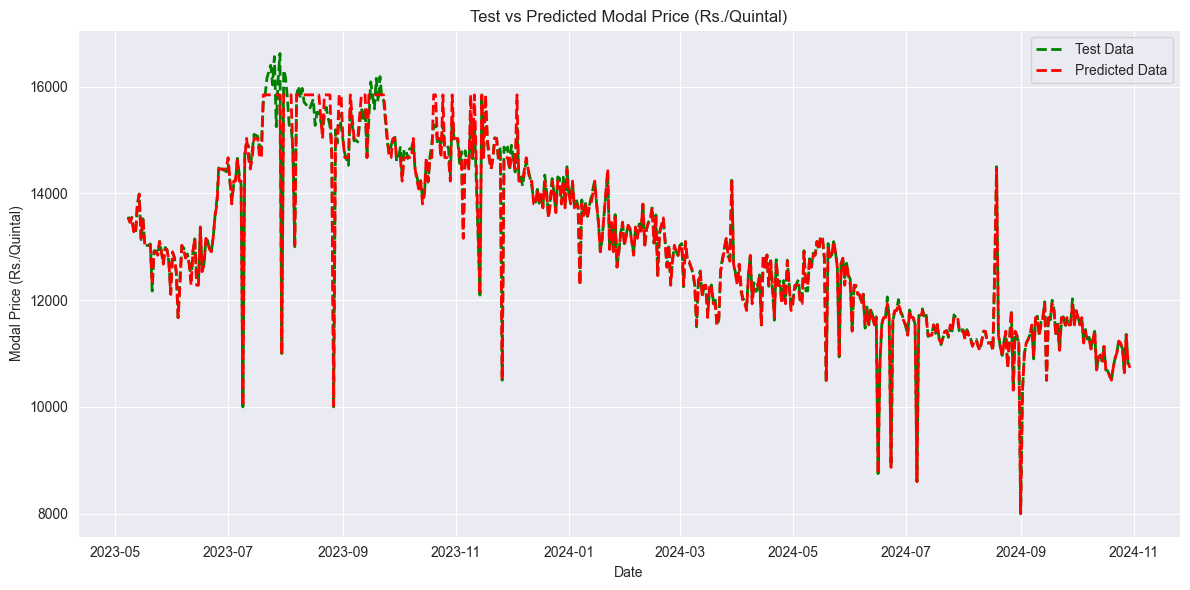

In [21]:
import matplotlib.pyplot as plt

# Plot the test data vs predicted values
plt.figure(figsize=(12, 6))

# Plot test data
plt.plot(y_test.index, y_test, label="Test Data", color="green", linestyle="--", linewidth=2)

# Plot predicted data
plt.plot(y_test.index, y_pred, label="Predicted Data", color="red", linestyle="--", linewidth=2)

# Title and labels
plt.title("Test vs Predicted Modal Price (Rs./Quintal)")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Root Mean Squared Error (RMSE): 580.1789343636211
Mean Squared Error (MSE): 336607.59587930696
Mean Absolute Error (MAE): 426.64383327012627
R^2 Score (Accuracy): 0.7869835583656011
Best Parameters from GridSearchCV: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}


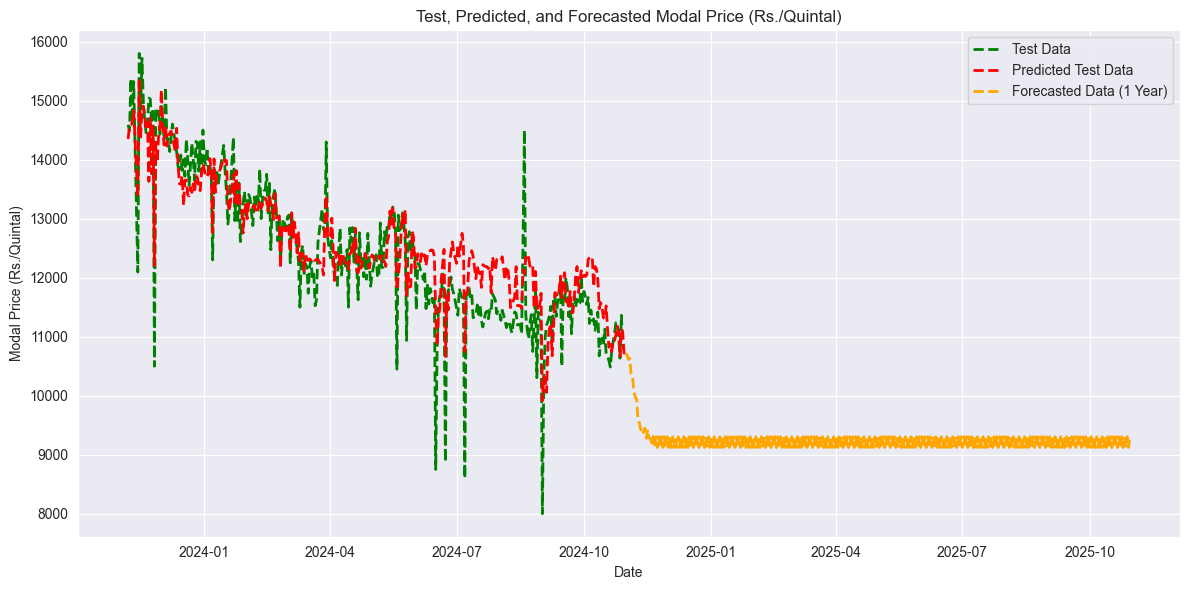

In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_filtered is your DataFrame with feature engineering already done
# Define features (X) and target (y)
X = df_filtered.drop(columns=['Modal Price (Rs./Quintal)'])
y = df_filtered['Modal Price (Rs./Quintal)']

# Split into training and testing sets
train_size = int(len(df_filtered) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Accuracy for regression (R^2 score)
accuracy = best_model.score(X_test, y_test)

# Print metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Accuracy):", accuracy)
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
last_data_point = X_test.iloc[-1:]

# Define the lagged features that your model uses (e.g., lag_1, lag_7, lag_30, rolling_mean_7, etc.)
# Assuming you have lag columns and other derived features in your test set

future_predictions = []

for i in range(365):
    # Predict the next value based on the current data point
    next_prediction = best_model.predict(last_data_point.values.reshape(1, -1))[0]
    future_predictions.append(next_prediction)

    # Update the last_data_point with new lag values, using the prediction as a new feature
    # Example of how lag and derived features would be updated after each prediction

    # Shift the lags to simulate "forward" movement in time, e.g., lag_1 becomes lag_7, lag_7 becomes lag_30
    new_data_point = last_data_point.copy()

    # Update lag features based on the predicted value
    new_data_point['lag_1'] = next_prediction  # Update lag_1 with the predicted value
    new_data_point['lag_7'] = new_data_point['lag_1']  # Assuming lag_7 becomes lag_1 after one step
    new_data_point['lag_30'] = new_data_point['lag_7']  # Similarly for lag_30

    # Update rolling mean, assuming lag_1 and lag_7 are the most recent lags
    new_data_point['rolling_mean_7'] = np.mean([new_data_point['lag_1'], new_data_point['lag_7']])
    new_data_point['rolling_mean_30'] = np.mean([new_data_point['lag_30'], new_data_point['lag_7']])

    # Update Exponential Moving Averages (EMA)
    new_data_point['ema_7'] = 0.7 * new_data_point['lag_1'] + 0.3 * new_data_point['ema_7']  # example update
    new_data_point['ema_30'] = 0.7 * new_data_point['lag_7'] + 0.3 * new_data_point['ema_30']  # example update

    # Set the updated data point as the new last_data_point for the next iteration
    last_data_point = new_data_point

# Create a date range for the future predictions (next year)
future_dates = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')

# Convert the future predictions into a pandas Series
future_predictions_series = pd.Series(future_predictions, index=future_dates)

# Plot the test data, predicted values (test), and forecast for the next year
plt.figure(figsize=(12, 6))

# Plot test data
plt.plot(y_test.index, y_test, label="Test Data", color="green", linestyle="--", linewidth=2)

# Plot predictions on the test data
plt.plot(y_test.index, y_pred, label="Predicted Test Data", color="red", linestyle="--", linewidth=2)

# Plot forecasted data for the next year
plt.plot(future_predictions_series.index, future_predictions_series, label="Forecasted Data (1 Year)", color="orange", linestyle="--", linewidth=2)

# Title and labels
plt.title("Test, Predicted, and Forecasted Modal Price (Rs./Quintal)")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Root Mean Squared Error (RMSE): 580.1789343636211
Mean Squared Error (MSE): 336607.59587930696
Mean Absolute Error (MAE): 426.64383327012627
R^2 Score (Accuracy): 0.7869835583656011
Best Parameters from GridSearchCV: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}


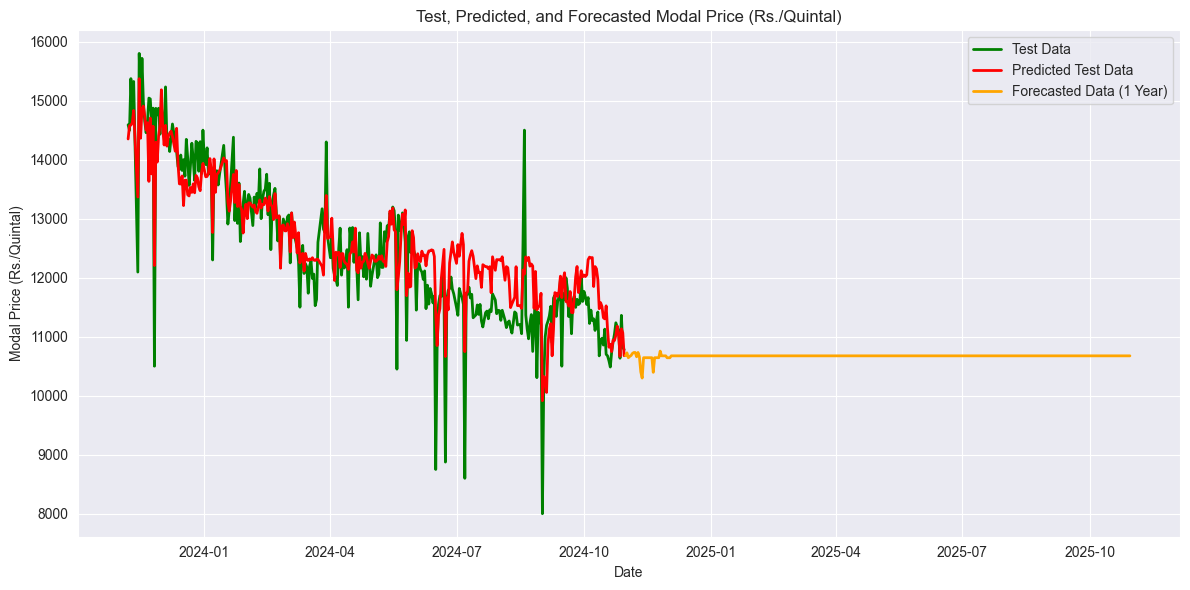

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_filtered is your DataFrame with feature engineering already done
# Define features (X) and target (y)
X = df_filtered.drop(columns=['Modal Price (Rs./Quintal)'])
y = df_filtered['Modal Price (Rs./Quintal)']

# Split into training and testing sets
train_size = int(len(df_filtered) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Accuracy for regression (R^2 score)
accuracy = best_model.score(X_test, y_test)

# Print metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Accuracy):", accuracy)
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

future_predictions = []
forecast_df = df_filtered.copy()
last_data_point = X_test.iloc[-1:].copy()
for i in range(365):
    next_prediction = best_model.predict(last_data_point.values.reshape(1, -1))[0]
    future_predictions.append(next_prediction)
    new_date = y_test.index[-1] + pd.Timedelta(days=i+1)
    new_row = pd.DataFrame({'Modal Price (Rs./Quintal)': [next_prediction]}, index=[new_date])
    forecast_df = pd.concat([forecast_df, new_row])
    forecast_df['rolling_mean_7'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=7).mean()
    forecast_df['rolling_mean_30'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=30).mean()
    forecast_df['rolling_median_7'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=7).median()
    forecast_df['ema_7'] = forecast_df['Modal Price (Rs./Quintal)'].ewm(span=7, adjust=False).mean()
    forecast_df['ema_30'] = forecast_df['Modal Price (Rs./Quintal)'].ewm(span=30, adjust=False).mean()
    last_data_point = forecast_df.iloc[-1:][X_train.columns]
future_dates = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')
future_predictions_series = pd.Series(future_predictions, index=future_dates)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Test Data", color="green", linewidth=2)
plt.plot(y_test.index, y_pred, label="Predicted Test Data", color="red", linewidth=2)
plt.plot(future_predictions_series.index, future_predictions_series, label="Forecasted Data (1 Year)", color="orange", linewidth=2)

# Title and labels
plt.title("Test, Predicted, and Forecasted Modal Price (Rs./Quintal)")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Root Mean Squared Error (RMSE): 920.2547352218952
Mean Squared Error (MSE): 846868.7776983205
Mean Absolute Error (MAE): 677.0730652443655
R^2 Score (Accuracy): 0.4640733727789922
Best Parameters from GridSearchCV: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}


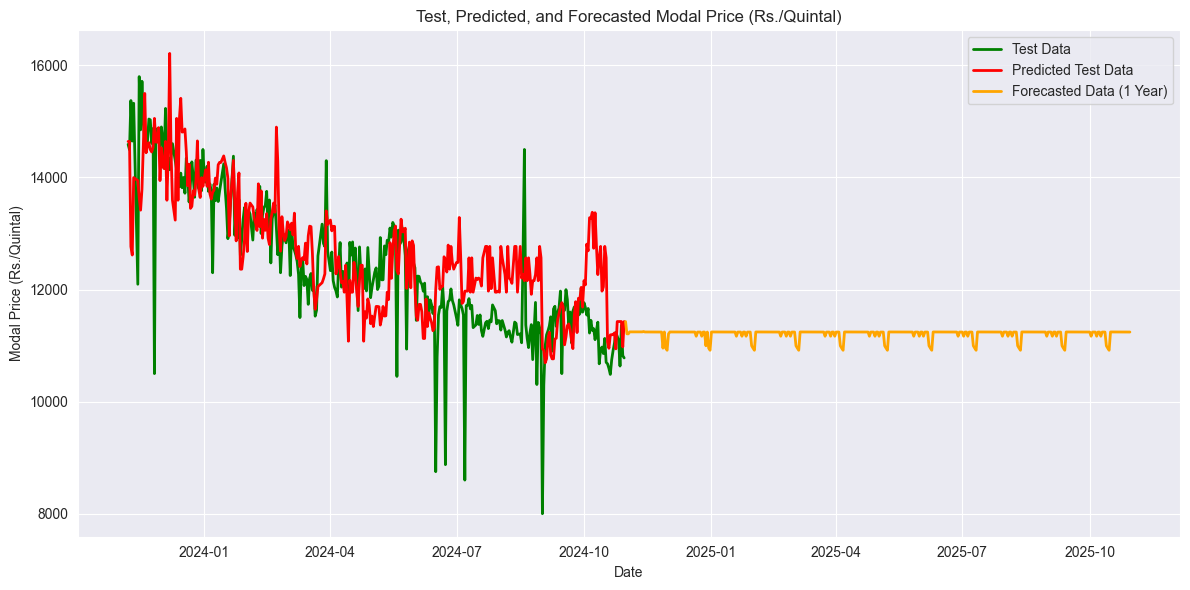

In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_filtered is your DataFrame with feature engineering already done
# Define only the 30-day features for the model
selected_features = ['lag_30', 'rolling_mean_30', 'ema_30']

# Define features (X) and target (y)
X = df_filtered[selected_features]
y = df_filtered['Modal Price (Rs./Quintal)']

# Split into training and testing sets
train_size = int(len(df_filtered) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Accuracy for regression (R^2 score)
accuracy = best_model.score(X_test, y_test)

# Print metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Accuracy):", accuracy)
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Initialize the DataFrame for future predictions
future_predictions = []
forecast_df = df_filtered.copy()  # Copy the existing DataFrame to append new values

# Start with the last data point in the test set
last_data_point = X_test.iloc[-1:].copy()  # Ensure it’s a DataFrame, not a Series

# Forecast for 365 days (next year)
for i in range(365):
    # Predict the next value based on the current data point
    next_prediction = best_model.predict(last_data_point.values.reshape(1, -1))[0]
    future_predictions.append(next_prediction)

    # Store the prediction in the dataframe to calculate new rolling features
    new_date = y_test.index[-1] + pd.Timedelta(days=i+1)

    # Create a new row with the predicted value
    new_row = pd.DataFrame({'Modal Price (Rs./Quintal)': [next_prediction]}, index=[new_date])

    # Append the new row using pd.concat
    forecast_df = pd.concat([forecast_df, new_row])

    # Calculate rolling features for the new data point using the full DataFrame
    forecast_df['rolling_mean_7'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=7).mean()
    forecast_df['rolling_mean_30'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=30).mean()
    forecast_df['rolling_median_7'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=7).median()
    forecast_df['ema_7'] = forecast_df['Modal Price (Rs./Quintal)'].ewm(span=7, adjust=False).mean()
    forecast_df['ema_30'] = forecast_df['Modal Price (Rs./Quintal)'].ewm(span=30, adjust=False).mean()

    # Update the last_data_point with the newly appended values (i.e., the new predicted value)
    last_data_point = forecast_df.iloc[-1:][X_train.columns]

# Create a date range for the future predictions (next year)
future_dates = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')

# Convert the future predictions into a pandas Series
future_predictions_series = pd.Series(future_predictions, index=future_dates)

# Plot the test data, predicted values (test), and forecast for the next year
plt.figure(figsize=(12, 6))

# Plot test data
plt.plot(y_test.index, y_test, label="Test Data", color="green", linewidth=2)

# Plot predictions on the test data
plt.plot(y_test.index, y_pred, label="Predicted Test Data", color="red", linewidth=2)

# Plot forecasted data for the next year
plt.plot(future_predictions_series.index, future_predictions_series, label="Forecasted Data (1 Year)", color="orange", linewidth=2)

# Title and labels
plt.title("Test, Predicted, and Forecasted Modal Price (Rs./Quintal)")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Root Mean Squared Error (RMSE): 393.26520838583826
Mean Squared Error (MSE): 154657.5241267568
Mean Absolute Error (MAE): 189.84905491735583
R^2 Score (Accuracy): 0.9363198843675388
Best Parameters from GridSearchCV: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


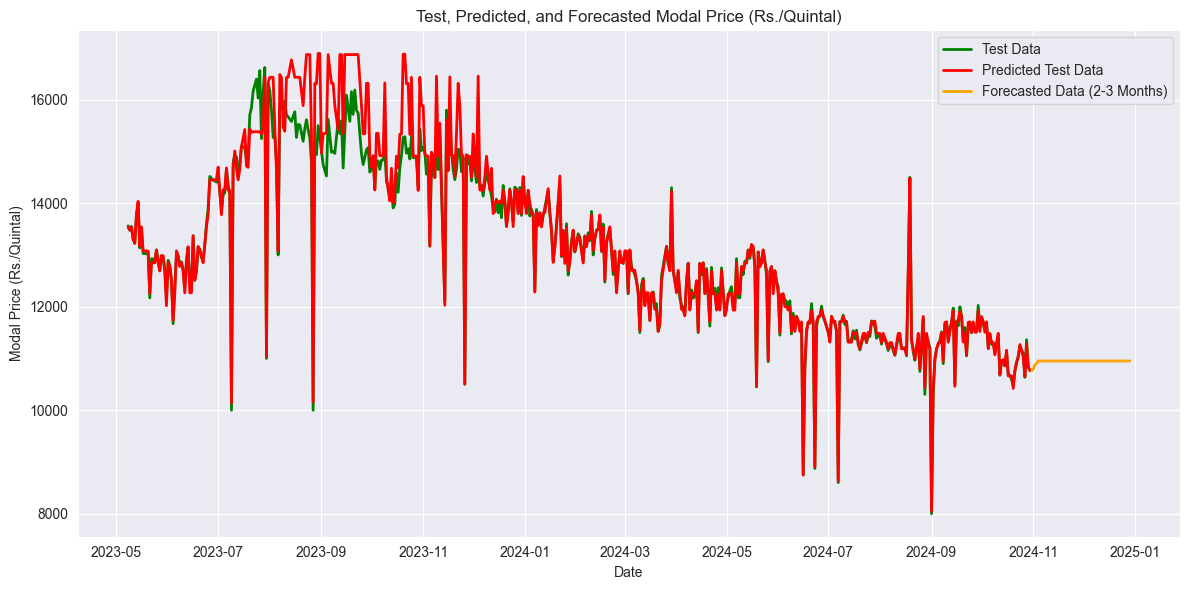

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_filtered is your DataFrame with feature engineering already done
# Select features and target
X = df_filtered[['Modal Price (Rs./Quintal)', 'lag_1', 'lag_7', 'lag_30',
                 'rolling_mean_7', 'rolling_mean_30', 'ema_7', 'ema_30', 'rolling_median_7']]
y = df_filtered['Modal Price (Rs./Quintal)']

# Split into training and testing sets
train_size = int(len(df_filtered) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Accuracy for regression (R^2 score)
accuracy = best_model.score(X_test, y_test)

# Print metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Accuracy):", accuracy)
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Initialize the DataFrame for future predictions
future_predictions = []
forecast_df = df_filtered.copy()  # Copy the existing DataFrame to append new values

# Start with the last data point in the test set
last_data_point = X_test.iloc[-1:].copy()  # Ensure it’s a DataFrame, not a Series

# Forecast for 60-90 days (2-3 months)
for i in range(60):  # Forecasting for the next 60 days (2 months)
    # Predict the next value based on the current data point
    next_prediction = best_model.predict(last_data_point.values.reshape(1, -1))[0]
    future_predictions.append(next_prediction)

    # Store the prediction in the dataframe to calculate new rolling features
    new_date = y_test.index[-1] + pd.Timedelta(days=i+1)

    # Create a new row with the predicted value
    new_row = pd.DataFrame({'Modal Price (Rs./Quintal)': [next_prediction]}, index=[new_date])

    # Append the new row using pd.concat
    forecast_df = pd.concat([forecast_df, new_row])

    # Calculate rolling features for the new data point using the full DataFrame
    forecast_df['rolling_mean_7'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=7).mean()
    forecast_df['rolling_mean_30'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=30).mean()
    forecast_df['rolling_median_7'] = forecast_df['Modal Price (Rs./Quintal)'].rolling(window=7).median()
    forecast_df['ema_7'] = forecast_df['Modal Price (Rs./Quintal)'].ewm(span=7, adjust=False).mean()
    forecast_df['ema_30'] = forecast_df['Modal Price (Rs./Quintal)'].ewm(span=30, adjust=False).mean()

    # Update the last_data_point with the newly appended values (i.e., the new predicted value)
    last_data_point = forecast_df.iloc[-1:][X_train.columns]

# Create a date range for the future predictions (next 2-3 months)
future_dates = pd.date_range(start=y_test.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')

# Convert the future predictions into a pandas Series
future_predictions_series = pd.Series(future_predictions, index=future_dates)

# Plot the test data, predicted values (test), and forecast for the next 2-3 months
plt.figure(figsize=(12, 6))

# Plot test data
plt.plot(y_test.index, y_test, label="Test Data", color="green", linewidth=2)

# Plot predictions on the test data
plt.plot(y_test.index, y_pred, label="Predicted Test Data", color="red", linewidth=2)

# Plot forecasted data for the next 2-3 months
plt.plot(future_predictions_series.index, future_predictions_series, label="Forecasted Data (2-3 Months)", color="orange", linewidth=2)

# Title and labels
plt.title("Test, Predicted, and Forecasted Modal Price (Rs./Quintal)")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Training Size: 60%
Root Mean Squared Error (RMSE): 749.0503004233052
Mean Absolute Error (MAE): 480.601041818813


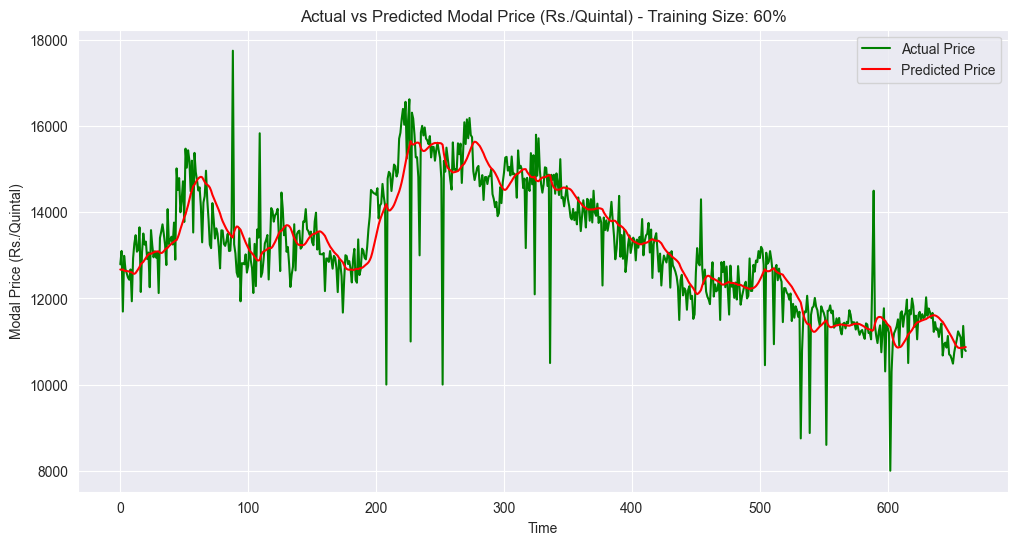

/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Training Size: 70%
Root Mean Squared Error (RMSE): 742.7554302580621
Mean Absolute Error (MAE): 456.812015937482


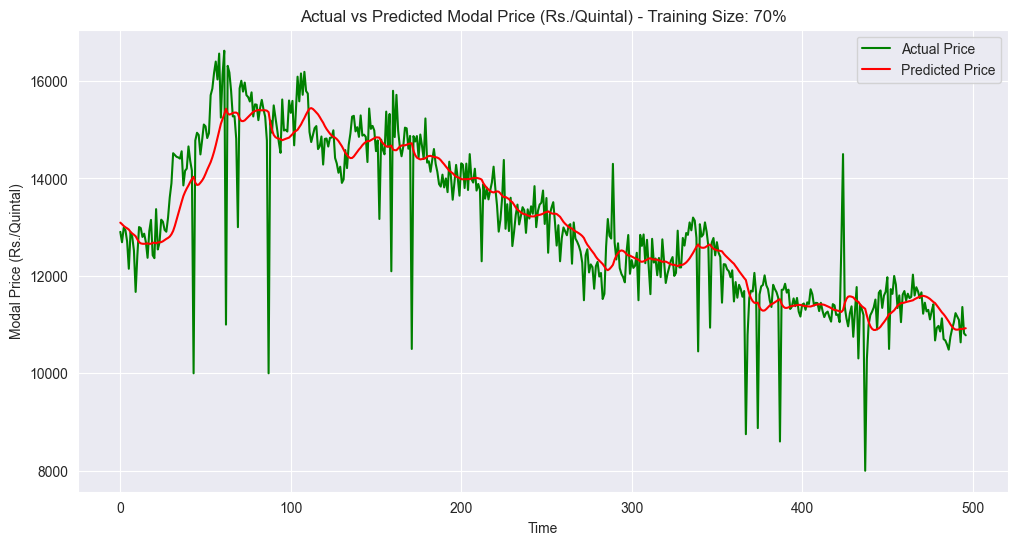

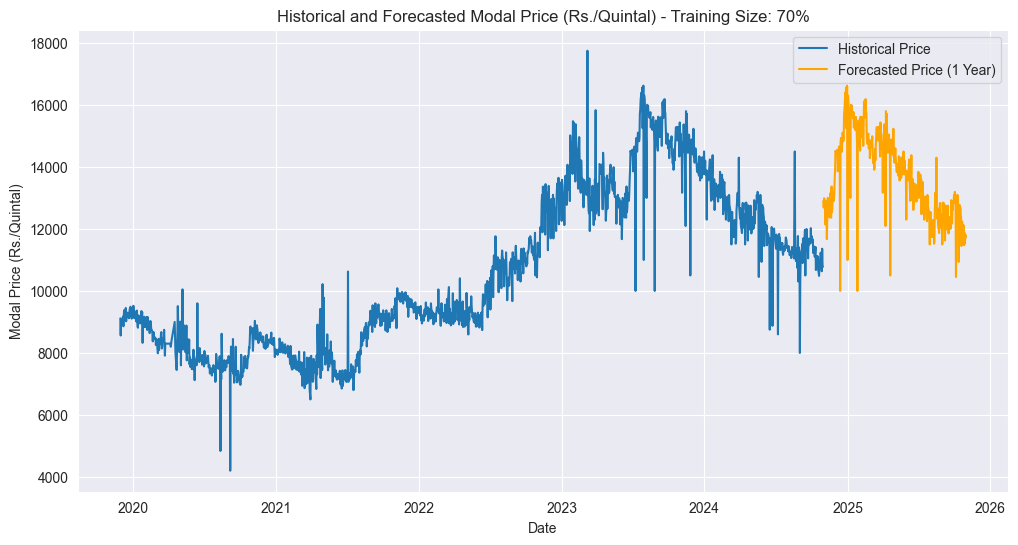

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Extract only the target column
target_column = 'Modal Price (Rs./Quintal)'
data = df_filtered[[target_column]]  # Keep only the 'Modal Price' column

# Scale the target column
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Define function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(data_scaled, sequence_length)

# Reshape X for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the initial training size (60%)
initial_train_size = 0.6
increment_size = 0.1

# Loop over training sizes from 60% to 100% in increments of 10%
for i in range(2):
    train_size = int((initial_train_size + i * increment_size) * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model with early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    print(f"Training Size: {(initial_train_size + i * increment_size) * 100:.0f}%")
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled, label='Actual Price', color='green')
    plt.plot(y_pred_rescaled, label='Predicted Price', color='red')
    plt.title(f"Actual vs Predicted Modal Price (Rs./Quintal) - Training Size: {(initial_train_size + i * increment_size) * 100:.0f}%")
    plt.xlabel("Time")
    plt.ylabel("Modal Price (Rs./Quintal)")
    plt.legend()
    plt.show()

# Forecast for one additional year (365 days)
future_predictions = []
last_sequence = X_test[-1]  # Last sequence from the test set

# Initialize current_index to the start of the test set
current_index = 0  # Correct the starting index for the test set

for _ in range(365):
    # Ensure current_index is within the bounds of the test set
    if current_index < len(y_test):
        next_actual_value = y_test[current_index]

        # Inverse transform to get actual value
        next_actual_value_rescaled = scaler.inverse_transform(next_actual_value.reshape(1, -1))
        future_predictions.append(next_actual_value_rescaled[0][0])

        # Update last_sequence by removing the first value and adding the actual next value
        last_sequence = np.append(last_sequence[1:], next_actual_value).reshape(sequence_length, 1)

        # Move to the next index in the test set
        current_index += 1
    else:
        break  # Stop if you reach the end of the test set

# Create a date range for the future predictions
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions), freq='D')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[target_column], label='Historical Price')
plt.plot(future_dates, future_predictions, label='Forecasted Price (1 Year)', color='orange')
plt.title(f"Historical and Forecasted Modal Price (Rs./Quintal) - Training Size: {(initial_train_size + i * increment_size) * 100:.0f}%")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.show()


/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Training Size: 60%
Root Mean Squared Error (RMSE): 746.4141976837901
Mean Absolute Error (MAE): 480.51325049652723


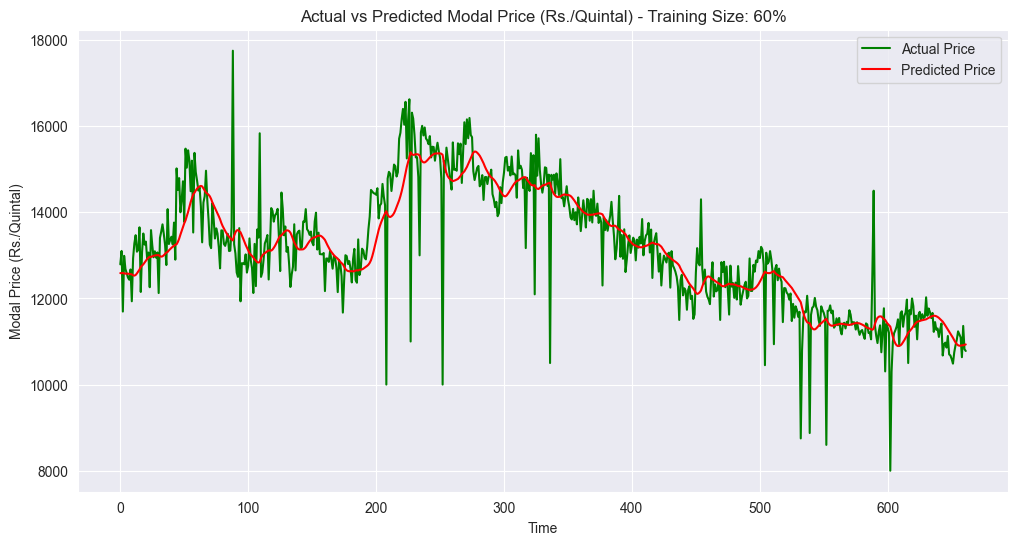

/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Training Size: 70%
Root Mean Squared Error (RMSE): 738.2595224916817
Mean Absolute Error (MAE): 447.3623995494057


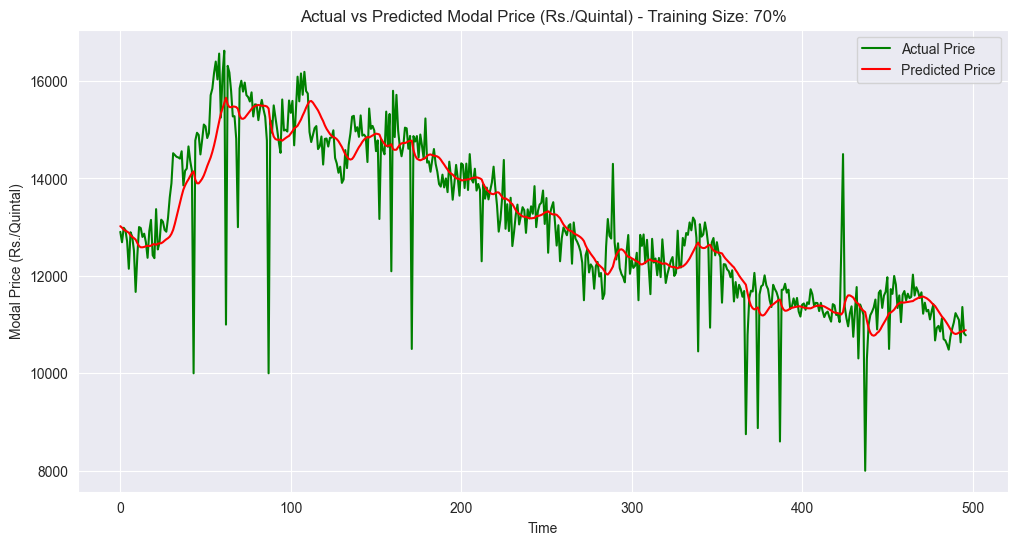

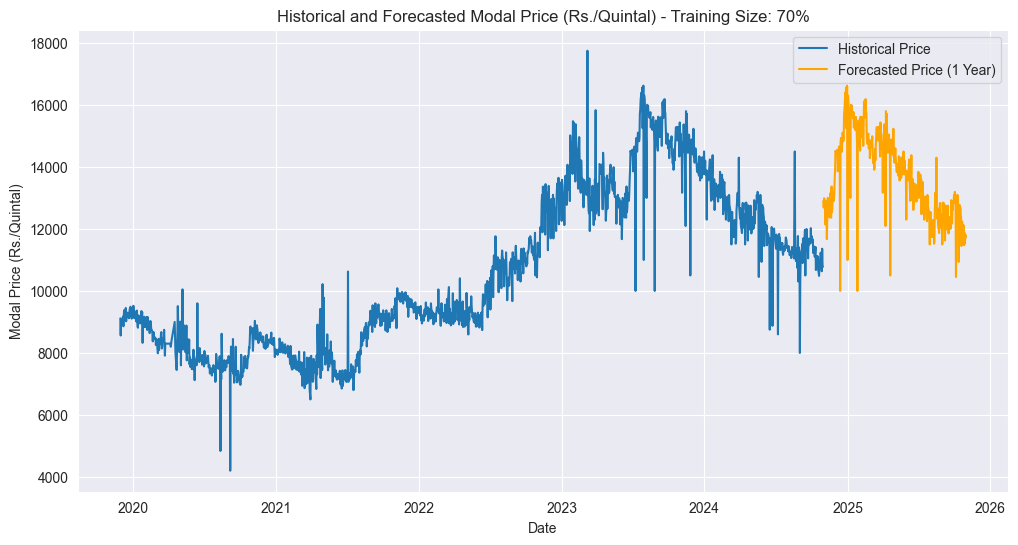

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Extract only the target column
target_column = 'Modal Price (Rs./Quintal)'
data = df_filtered[[target_column]]  # Keep only the 'Modal Price' column

# Scale the target column
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Define function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(data_scaled, sequence_length)

# Reshape X for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the initial training size (60%)
initial_train_size = 0.6
increment_size = 0.1

# Loop over training sizes from 60% to 100% in increments of 10%
for i in range(2):
    train_size = int((initial_train_size + i * increment_size) * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model with early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
    mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    print(f"Training Size: {(initial_train_size + i * increment_size) * 100:.0f}%")
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled, label='Actual Price', color='green')
    plt.plot(y_pred_rescaled, label='Predicted Price', color='red')
    plt.title(f"Actual vs Predicted Modal Price (Rs./Quintal) - Training Size: {(initial_train_size + i * increment_size) * 100:.0f}%")
    plt.xlabel("Time")
    plt.ylabel("Modal Price (Rs./Quintal)")
    plt.legend()
    plt.show()

# Forecast for one additional year (365 days)
future_predictions = []
last_sequence = X_test[-1]  # Last sequence from the test set

# Initialize current_index to the start of the test set
current_index = 0  # Correct the starting index for the test set

for _ in range(365):
    # Ensure current_index is within the bounds of the test set
    if current_index < len(y_test):
        next_actual_value = y_test[current_index]

        # Inverse transform to get actual value
        next_actual_value_rescaled = scaler.inverse_transform(next_actual_value.reshape(1, -1))
        future_predictions.append(next_actual_value_rescaled[0][0])

        # Update last_sequence by removing the first value and adding the actual next value
        last_sequence = np.append(last_sequence[1:], next_actual_value).reshape(sequence_length, 1)

        # Move to the next index in the test set
        current_index += 1
    else:
        break  # Stop if you reach the end of the test set

# Create a date range for the future predictions
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions), freq='D')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[target_column], label='Historical Price')
plt.plot(future_dates, future_predictions, label='Forecasted Price (1 Year)', color='orange')
plt.title(f"Historical and Forecasted Modal Price (Rs./Quintal) - Training Size: {(initial_train_size + i * increment_size) * 100:.0f}%")
plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.show()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1511 - val_loss: 0.0063
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0036
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - val_loss: 0.0047
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_loss: 0.0107
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0080 - val_loss: 0.0023
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0105 - val_loss: 0.0162
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - val_loss: 0.0033
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - val_loss: 0.0024
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - val_

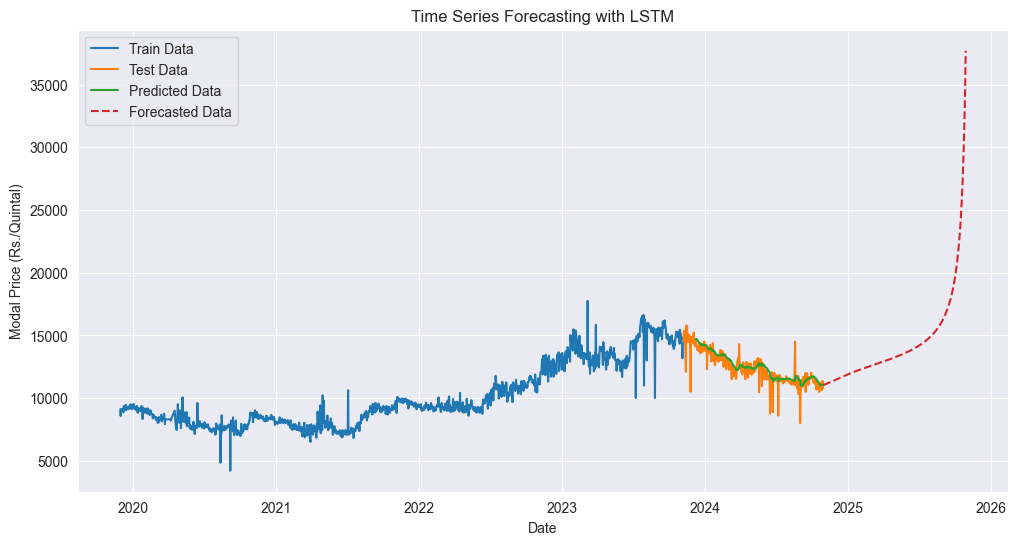

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress Keras warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')

# Assuming 'df_filtered' is your DataFrame with 'Price Date' as index
df_filtered = df_filtered.sort_index()  # Ensure sorted by 'Price Date'

# Extract relevant column for forecasting
data = df_filtered['Modal Price (Rs./Quintal)'].values
data = data.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Train-test split (80% train, 20% test)
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Define the number of time steps (lags)
n_input = 30  # Use 30 days to predict the next day's value

train_generator = TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=32)
test_generator = TimeseriesGenerator(test_data, test_data, length=n_input, batch_size=32)

# Define the LSTM model with Input layer
model = Sequential()
model.add(Input(shape=(n_input, 1)))  # Using Input layer
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

# Predict using the test data
predictions = model.predict(test_generator)

# Inverse transform the predictions and actual values to the original scale
predictions_rescaled = scaler.inverse_transform(predictions)
test_data_rescaled = scaler.inverse_transform(test_data[n_input:])

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_data_rescaled, predictions_rescaled))
mae = mean_absolute_error(test_data_rescaled, predictions_rescaled)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Extend the input data for forecasting
forecast_input = data_scaled[-n_input:]

# Forecast for the next year (365 days)
forecast = []
for i in range(365):
    # Reshape the input for the model
    forecast_input = forecast_input.reshape((1, n_input, 1))
    # Make the prediction
    predicted_value = model.predict(forecast_input)
    forecast.append(predicted_value)

    # Update the forecast_input by appending the predicted value
    forecast_input = np.append(forecast_input[0][1:], predicted_value)

# Rescale the forecast values
forecast_rescaled = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot train, test, predicted, and forecasted values
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(df_filtered.index[:train_size], scaler.inverse_transform(train_data), label='Train Data')

# Plot test data
plt.plot(df_filtered.index[train_size:], scaler.inverse_transform(test_data), label='Test Data')

# Plot predicted values
plt.plot(df_filtered.index[train_size + n_input:], predictions_rescaled, label='Predicted Data')

# Forecast dates (for one year)
forecast_dates = pd.date_range(df_filtered.index[-1], periods=365, freq='D')  # 365 days, not 366

# Plot forecasted data
plt.plot(forecast_dates, forecast_rescaled, label='Forecasted Data', linestyle='--')

plt.legend()
plt.title('Time Series Forecasting with LSTM')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.show()


Root Mean Squared Error (RMSE): 393.26520838583826
Mean Squared Error (MSE): 154657.5241267568
Mean Absolute Error (MAE): 189.84905491735583
R^2 Score (Accuracy): 0.9363198843675388
Best Parameters from GridSearchCV: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


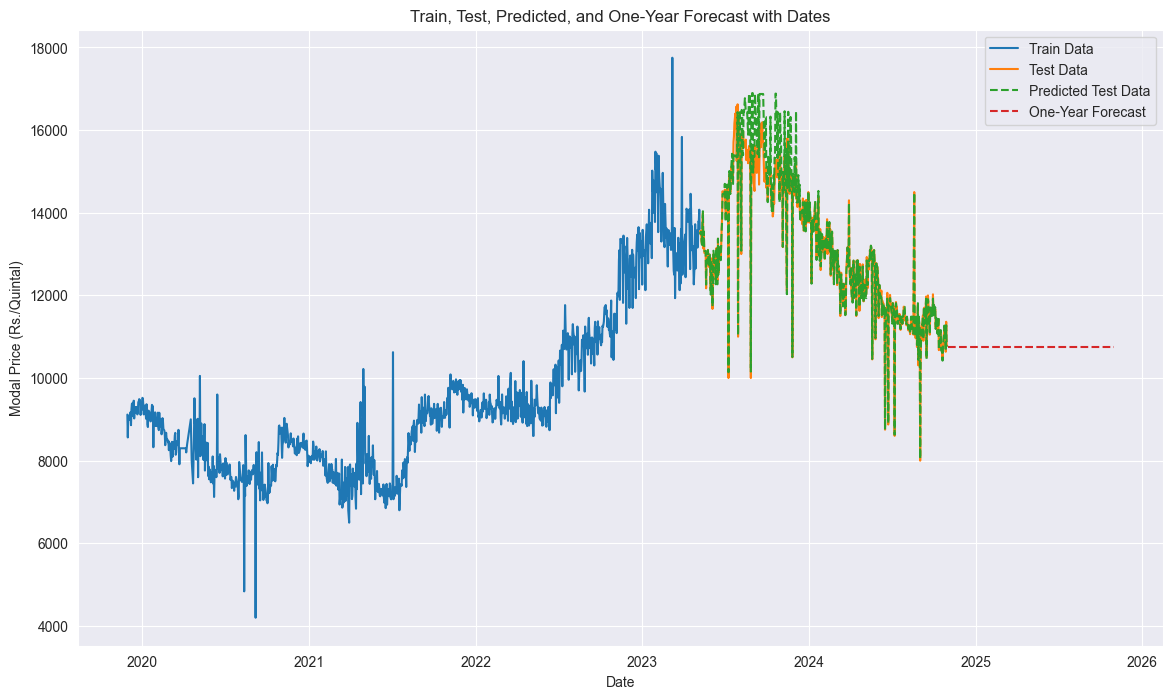

In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
features = ['Modal Price (Rs./Quintal)', 'lag_1', 'lag_7', 'lag_30',
            'rolling_mean_7', 'rolling_mean_30', 'ema_7', 'ema_30',
            'rolling_median_7']
X = df_filtered[features]
y = df_filtered['Modal Price (Rs./Quintal)']

# Temporal split for train and test sets
train_size = int(len(df_filtered) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize the model and GridSearchCV
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Test set predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = best_model.score(X_test, y_test)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Accuracy):", accuracy)
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Plot the train, test, and predicted values with 'Price Date' as the x-axis
plt.figure(figsize=(14, 8))
plt.plot(y_train.index, y_train, label="Train Data")
plt.plot(y_test.index, y_test, label="Test Data")
plt.plot(y_test.index, y_pred, label="Predicted Test Data", linestyle="--")

# Recursive Forecasting for One Year with Date Index
forecast_steps = 365
forecast = []
last_values = X_test.iloc[-1].copy()

# Set initial date for forecasting as the last date in the test set
forecast_dates = [y_test.index[-1] + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]

for _ in range(forecast_steps):
    temp_df = pd.DataFrame([last_values])
    next_pred = best_model.predict(temp_df)[0]
    forecast.append(next_pred)

    # Update last_values with the new prediction and recompute lagged features
    last_values['Modal Price (Rs./Quintal)'] = next_pred
    last_values['lag_1'] = last_values['Modal Price (Rs./Quintal)']
    last_values['lag_7'] = forecast[-7] if len(forecast) >= 7 else last_values['lag_7']
    last_values['lag_30'] = forecast[-30] if len(forecast) >= 30 else last_values['lag_30']
    last_values['rolling_mean_7'] = np.mean(forecast[-7:]) if len(forecast) >= 7 else last_values['rolling_mean_7']
    last_values['rolling_mean_30'] = np.mean(forecast[-30:]) if len(forecast) >= 30 else last_values['rolling_mean_30']
    last_values['ema_7'] = 0.3 * next_pred + 0.7 * last_values['ema_7']
    last_values['ema_30'] = 0.1 * next_pred + 0.9 * last_values['ema_30']
    last_values['rolling_median_7'] = np.median(forecast[-7:]) if len(forecast) >= 7 else last_values['rolling_median_7']

# Convert the forecast list into a Pandas Series with the new forecast_dates as the index
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot the forecast
plt.plot(forecast_series.index, forecast_series, label="One-Year Forecast", linestyle="--")

plt.xlabel("Date")
plt.ylabel("Modal Price (Rs./Quintal)")
plt.legend()
plt.title("Train, Test, Predicted, and One-Year Forecast with Dates")
plt.show()


In [31]:
df_filtered.columns

Index(['Modal Price (Rs./Quintal)', 'lag_1', 'lag_7', 'lag_30',
       'rolling_mean_7', 'rolling_mean_30', 'ema_7', 'ema_30',
       'rolling_median_7'],
      dtype='object')

In [68]:
df

,Modal Price (Rs./Quintal),lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,difference_1,difference_7,difference_30,ema_7,ema_30,rolling_std_7,rolling_median_7,month,weekday,pct_change_1,pct_change_7,pct_change_30
Price Date,,,,,,,,,,,,,,,,,,
2019-11-30,9115.230769,9109.410256,9421.973684,8854.900000,9138.237209,9331.141996,5.820513,-306.742915,260.330769,9185.549430,9244.343052,169.909639,9115.230769,11,5,0.000639,-0.032556,0.029400
2019-12-01,8562.500000,9115.230769,8825.000000,9385.238095,9100.737209,9303.717392,-552.730769,-262.500000,-822.738095,9029.787073,9200.353178,257.140606,9115.230769,12,6,-0.060638,-0.029745,-0.087663
2019-12-02,9067.380952,8562.500000,9365.270270,9147.720930,9058.181592,9301.039393,504.880952,-297.889318,-80.339978,9039.185543,9191.774325,229.196344,9109.410256,12,0,0.058964,-0.031808,-0.008783
2019-12-03,9058.829268,9067.380952,9209.987805,8768.888889,9036.587516,9310.704072,-8.551684,-151.158537,289.940379,9044.096474,9183.197224,219.422328,9085.215909,12,1,-0.000943,-0.016412,0.033065
2019-12-04,8991.325000,9058.829268,9085.215909,9199.375000,9023.174529,9303.769072,-67.504268,-93.890909,-208.050000,9030.903606,9170.818371,218.823203,9067.380952,12,2,-0.007452,-0.010334,-0.022616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,11096.297297,11163.900000,10592.647059,11633.807692,10954.783015,11188.554854,-67.602703,503.650238,-537.510395,11023.105896,11105.305038,262.875421,11042.821429,10,5,-0.006055,0.047547,-0.046202
2024-10-27,10635.166667,11096.297297,10485.714286,11543.956522,10976.133355,11158.261858,-461.130631,149.452381,-908.789855,10926.121089,11074.973530,221.193430,11042.821429,10,6,-0.041557,0.014253,-0.078724
2024-10-28,11361.281250,10635.166667,10748.242424,11568.166667,11063.710330,11151.365678,726.114583,613.038826,-206.885417,11034.911129,11093.444996,236.740272,11096.297297,10,0,0.068275,0.057036,-0.017884


Error with parameters (6, 4, 2): LU decomposition error.
Best ARIMA Parameters: (2, 5, 4)
RMSE: 2.464249679141946e+18
MAE: 2.350463856087649e+18


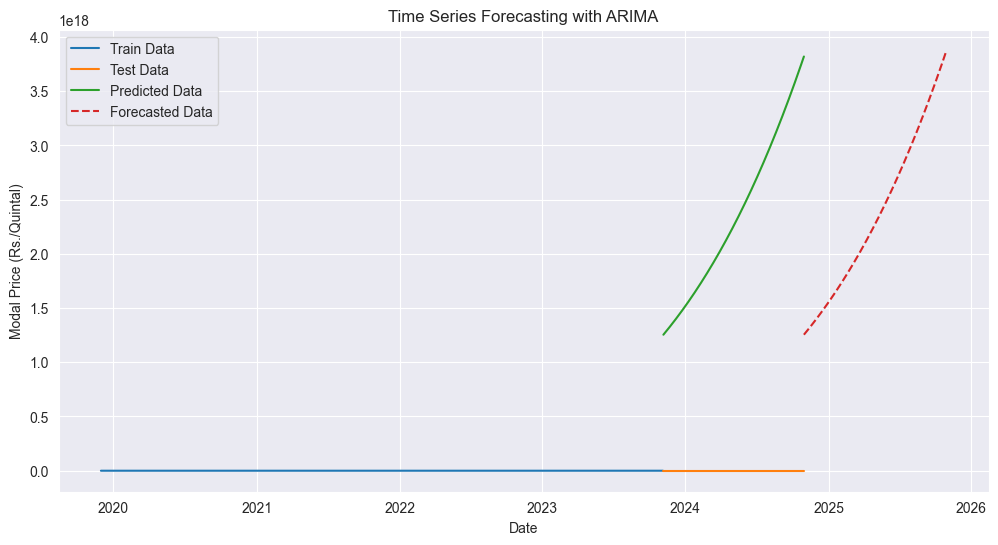

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools
import warnings

# Ensure warnings are ignored for cleaner output
warnings.filterwarnings('ignore')

df_filtered = df  # Assuming df is your original DataFrame
df_filtered.index = pd.to_datetime(df_filtered.index)

# Set the frequency to daily ('D') since the data is day-wise
df_filtered = df_filtered.asfreq('D', method='ffill')  # Forward fill missing dates

# Extract relevant column for forecasting (Modal Price)
data = df_filtered['Modal Price (Rs./Quintal)']

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Define the parameter grid for ARIMA model
p = q = range(0, 7)  # Possible values for p and q
d = range(0, 7)      # Possible values for d
pdq = list(itertools.product(p, d, q))  # All combinations of p, d, q

# Function to perform grid search for the best ARIMA model
def arima_grid_search(train_data, pdq):
    best_score, best_params = float('inf'), None
    best_model = None
    for param in pdq:
        try:
            # Fit ARIMA model
            model = ARIMA(train_data, order=param)
            model_fit = model.fit()

            # Calculate AIC (Akaike Information Criterion) as the model score
            score = model_fit.aic
            if score < best_score:
                best_score, best_params = score, param
                best_model = model_fit
        except Exception as e:
            print(f"Error with parameters {param}: {e}")
            continue
    return best_model, best_params

# Perform GridSearch for best ARIMA parameters
best_model, best_params = arima_grid_search(train_data, pdq)
print(f'Best ARIMA Parameters: {best_params}')

# Predict on the test data
predictions = best_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=True)

# Handle NaN values in test data and predictions
test_data = test_data.fillna(method='ffill')  # Impute NaN values in test data
predictions = np.nan_to_num(predictions, nan=np.nanmean(predictions))  # Impute NaN values in predictions

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Forecast for the next 365 days (1 year)
forecast_steps = 365
forecast = best_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot train, test, predicted, and forecasted data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(df_filtered.index[:train_size], train_data, label='Train Data')

# Plot test data
plt.plot(df_filtered.index[train_size:], test_data, label='Test Data')

# Plot predicted values
plt.plot(df_filtered.index[train_size:], predictions, label='Predicted Data')

# Forecast dates (for one year)
forecast_dates = pd.date_range(df_filtered.index[-1], periods=forecast_steps, freq='D')

# Plot forecasted data
plt.plot(forecast_dates, forecast_mean, label='Forecasted Data', linestyle='--')

# Add confidence intervals
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)

plt.legend()
plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.show()
